<a href="https://colab.research.google.com/github/Classification-Team-CW5/Team-CW5-Notebook/blob/main/Climate_Change_Beliefs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Predict: Climate Change Classification
© Explore Data Science Academy

### Honour Code
**TEAM CW5**, confirm - by submitting this document - that the solutions in this notebook are a result of our work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

### Predict Description
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<img src="https://github.com/Classification-Team-CW5/Classification-Data/blob/main/climate.jpg?raw=true" width=90%/> 

<a id="cont"></a>
## Table of Contents
<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. References</a>


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

We going to import all the python libraries that we will use in the notebook

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for data preparation
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample

# Libraries for model building
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.sparse
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import Pipeline

#Mute warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<a id="two"></a>
## 2. Loading the data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
# Load train and test datasets
train = pd.read_csv("https://raw.githubusercontent.com/Classification-Team-CW5/Classification-Data/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Classification-Team-CW5/Classification-Data/main/test_with_no_labels.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

This is the first step in EDA, we need to understand the variables in the data set, like what are the input variables and what are the output variables? Then we need to understand the type of the variables in the data set, like is it Integer? A float value? Or a String value? Lastly we need to analyze if the variables are continuous or categorical. Gender is an example of categorical variable while height is an example of continuous variable

In [3]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
test.shape

(10546, 2)

In [ ]:
# Shape of the dataset
train.shape

(15819, 3)

From the analysis we find that there are a total of 15819 rows and 3 columns.

In [ ]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [ ]:
# dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


As it can be seen, the dataframe has two numeric columns (int64) and one categorical column (object).

And it can also be seen that the dataframe has no null/missing values

## Looking at the numbers of possible classes in our sentiment

In [ ]:
train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

Class Description
- 2 News: the tweet links to factual news about climate change
- 1 Pro: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change

In [ ]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

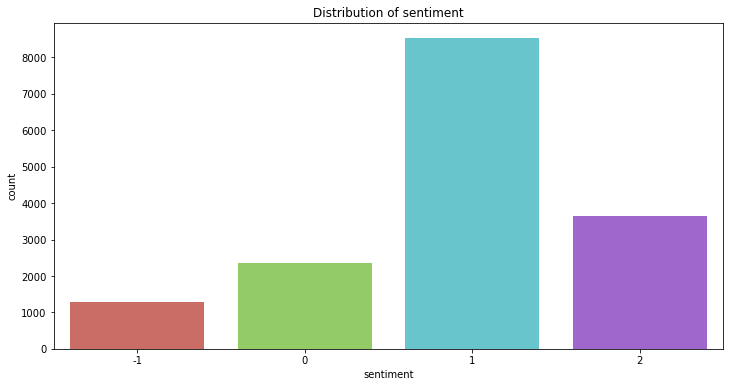

In [ ]:
# A sentiment bar graph plot 
plt.figure (figsize= (12,6))
sns.countplot(x = 'sentiment', data = train, palette="hls")
plt.title("Distribution of sentiment");

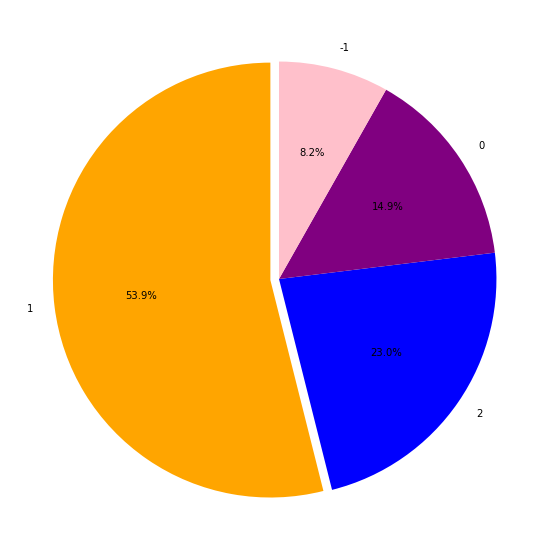

In [ ]:
plt.figure (figsize= (16,10))
values = train['sentiment'].value_counts()/train.shape[0]
labels = (train['sentiment'].value_counts()/train.shape[0]).index
colors = ['orange', 'blue', 'purple', 'pink']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.show()

### There is imbalanced classes in the dataset

Imbalanced classes put “accuracy” out of business. This is a surprisingly common problem in machine learning (specifically in classification), occurring in datasets with a disproportionate ratio of observations in each class.

Standard accuracy no longer reliably measures performance, which makes model training much trickier.

### How much class is imbalanced?
Two factors **balance_accuracy_score** and **accuracy_score are** to be considered to know how much the class is imbalanced.

balanced_accuracy_score computes balanced accuracy and it is used to deal with an imbalanced dataset for both binary or multiclass classification problems. It is defined as the average of recall obtained in each class.

Whereas the accuracy score is the accuracy classification score. The difference between these two accuracy scores will be zero for the balanced dataset. That is for a balanced dataset the balanced_accuracy_score becomes equivalent to the accuracy_score.
<img src="https://github.com/Classification-Team-CW5/Classification-Data/blob/main/imbalance.png?raw=true" width=90%/> 


In [ ]:
# check for duplicated data
len(train[train.duplicated()])

0

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## Text Cleaning

Display some tweets that will help us understand what to do when we are trying to clean the messages that we have in the dataset.

In [ ]:
for x in train['message'][30:150]:
    print(x)

@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice
RT @Honey17011: A guide to global warming, Paris pact and the US role #DemForce #TheResistance #UniteBlue https://t.co/RYiBLwAJZ4
RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…
Denying climate change ignores basic science
BGR ~ China practically says Trump lied about climate change https://t.co/Rz37HtcS8d
RT @BernieSanders: #ImVotingBecause the future of the planet is at stake. Hillary Clinton will combat climate change. Donald Trump thinks iÃ¢â‚¬Â¦
RT @Independent: Trump's team removed climate change data from the White House website. They may be breaking the law…
RT @DeboraheHart: Toxic soils, aquifers, vast amts of wasted (+ waste) water, runaway climate change - what part of gas fracking don'…
RT @BettyBowers: America: Where climate change is “unproven” to people 100% sure a guy called Noah fit all the w

From the tweets it can be seen that the messages have characters like <font color='red'>Emojis</font>, since <font color='red'>Emojis</font> are a new way to express something humans have known for a long time: symbols have power that goes beyond words. As we put it when we unveiled hearts on Twitter, “The heart… is a universal symbol that resonates across languages, cultures, and time zone..

### A function to clean our text column

In [ ]:
# Define a cleaning function to clean the Tweets
def clean_tweets(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text) # Removing @mentions or usernames
    text = re.sub(r'#','',text) # Removing #tag symbol
    text = re.sub(r'RT[\s]+',' ',text) # Remvoing RT (Retweet)
    text = re.sub(r'\n','',text) # Removing newlines
    text = re.sub(r',','',text) # Removing commas
    text = re.sub(r'.[.]+','',text) # Removing full stops
    text = re.sub(r'\w+:\/\/\S+','',text) 
    text = re.sub(r'https?:\/\/\S+','',text) # Removing hyperlinks
    text = re.sub(r'/',' ',text) # Removing the / character
    text = re.sub(r'-',' ',text) # Removing the - character
    text = re.sub(r'_',' ',text) # Removing the _ character
    text = re.sub(r'!','',text) # Removing the ! character
    text = re.sub(r':',' ',text) # Removing the : character
    text = re.sub(r'$','',text) # Removing the $ character
    text = re.sub(r'%','',text) # Removing the % character
    text = re.sub(r'^','',text) # Removing the ^ character
    text = re.sub(r'&','',text) # Removing the & character
    text = re.sub(r'=',' ',text) # Replace '=' with a whitespace
    text = re.sub(r' +',' ',text) # Removing extra whitespaces

    return text

In [ ]:
# Define a function to remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

### Apply clean_tweets and remove_emoji functions to the dataframe

In [ ]:
train['message'] = train['message'].apply(clean_tweets) # Applying function clean tweets to the dataset
train['message'] = train['message'].apply(remove_emoji) # Applying function to remove emojis to the dataset
train['message'] = train.message.str.lower() # Making all texts to lower case
train['message'] = train['message'].str.strip() # Removing leading and trailing whitespaces

test['message'] = test['message'].apply(clean_tweets) # Applying function clean tweets to the dataset
test['message'] = test['message'].apply(remove_emoji) # Applying function to remove emojis to the dataset
test['message'] = test.message.str.lower() # Making all texts to lower case
test['message'] = test['message'].str.strip() # Removing leading and trailing whitespaces

#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\F5469333\AppData\Local\Temp/ipykernel_17180/3796894799.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
# Creating a df that is copy of the train set.
df = train.copy()

In [ ]:
# Define a function to remove punctuation
string.punctuation
punctuations_list = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

df['message'] = df['message'].apply(lambda x: cleaning_punctuations(x))

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Training using imbalanced sentiment

In [ ]:
# Splitting data into Train and Test sets:
X = df['message']
y = df['sentiment']

In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, train_size=0.8, random_state=42)

In [ ]:
model_svc = SVC() # Define a Support Vector Machine algorithm
model_svc.fit(X_train, y_train) # Fitting the model
svc_pred = model_svc.predict(X_test) # Make predictions

In [ ]:
print('F1_score: ',round(metrics.f1_score(y_test,svc_pred, average = 'weighted'),4))

F1_score:  0.68


In [ ]:
testx = test['message'] #also transform x_test
test_vect = vectorizer.transform(testx)

In [ ]:
y_pred = model_svc.predict(test_vect) #predict model with transform test data

In [ ]:
test['sentiment'] = y_pred

In [ ]:
test.head()

,message,tweetid,sentiment
0,europe will now be looking to china to make sure that it is not alone in fighting climate change…,169760,1
1,combine this with the polling of staffers re climate change and womens' rights and you have a fascist stat,35326,1
2,the scary unimpeachable evidence that climate change is already here itstimetochange climatechange,224985,1
3,putin got to you too jill trump doesn't believe in climate change at all thinks it's s hoax,476263,1
4,'female orgasms cause global warming' sarcastic republican,872928,0


In [ ]:
test.shape

(10546, 3)

### Handling Imbalanced Classes

In machine learning, **“imbalanced classes”** is a familiar problem particularly occurring in classification when we have datasets with an unequal ratio of data points in each class. Training of model becomes much trickier as typical accuracy is no longer a reliable metric for measuring the performance of the model. Now if the number of data points in minority class is much less, then it may end up being completely ignored during training.

### Resampling
Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

- 1. **Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.

- 2. **Downsampling**: Where you decrease the frequency of the samples, such as from days to months.
In both cases, data must be invented.


In the case of upsampling, care may be needed in determining how the fine-grained observations are calculated using interpolation. In the case of downsampling, care may be needed in selecting the summary statistics used to calculate the new aggregated values.

There are perhaps two main reasons why you may be interested in resampling your time series data:

- 1. **Problem Framing**: Resampling may be required if your data is not available at the same frequency that you want to make predictions.

- 2. **Feature Engineering**: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

<img src="https://github.com/Classification-Team-CW5/Classification-Data/blob/main/resample.png?raw=true" width=60%/> 

In [ ]:
# importing the module and creating a resampling variable
data = train.copy()
class_size = int(len(data[data['sentiment']==1])/2)

In [ ]:
# Seperating the four classes
class_1 = data[data['sentiment']==-1]
class_2 = data[data['sentiment']==0]
class_3 = data[data['sentiment']==1]
class_4 = data[data['sentiment']==2]

In [ ]:
# upsampling classes 1, 2, and 4 & downsampling class 3
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)

In [ ]:
# Creating a new DataFrame out of the balanced bata
re_sample_df = pd.concat([class_1_up, class_2_up, class_4_up,class_3_down])

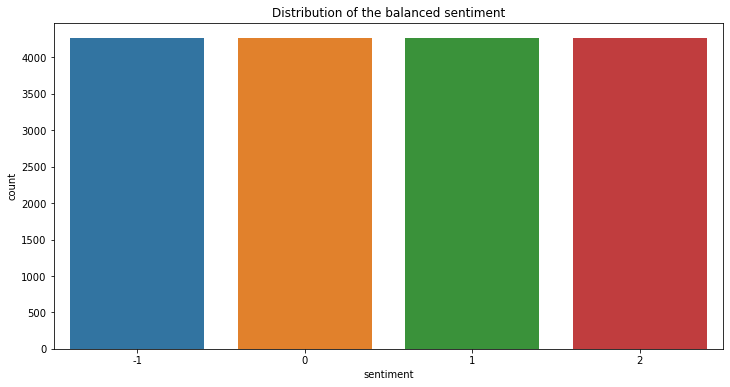

In [ ]:
# Checking if data has been well-balanced
plt.figure (figsize= (12,6))
sns.countplot(x = re_sample_df['sentiment'], data = data)
plt.title('Distribution of the balanced sentiment')
plt.show()

### Training using balanced sentiment

In [ ]:
# Defining the features as well as the label
X1 = re_sample_df['message']
X_re_sample = X1.apply(clean_tweets)
X_re_sample = X1.apply(remove_emoji)
X_re_sample = X1.apply(cleaning_punctuations)
y_re_sample = re_sample_df['sentiment']

In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features
X_vectorized_re_sample = vectorizer.fit_transform(X_re_sample)

In [ ]:
X_train_re_sample, X_test_re_sample, y_train_re_sample, y_test_re_sample=train_test_split(X_vectorized_re_sample,
                                                                                            y_re_sample,
                                                                                            train_size=0.8,
                                                                                            random_state=42)

In [ ]:
model_svc_2 = SVC()
model_svc_2.fit(X_train_re_sample, y_train_re_sample)
svc_pred_2 = model_svc_2.predict(X_test_re_sample)

In [ ]:
print('F1_score: ',round(metrics.f1_score(y_test_re_sample,svc_pred_2, average = 'weighted'),4))

F1_score:  0.88


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

print(svc_pred)
print(type(svc_pred))

my_array = svc_pred
print(len(my_array))

submission = pd.DataFrame(my_array,columns = ['target'])
submission['id'] = test['id']
submission = submission[['id','target']]
submission.to_csv('submission.csv', index=False)
submission

In [ ]:
https://medium.com/nerd-for-tech/class-imbalance-problem-and-ways-to-handle-it-4861a195398a

https://medium.com/geekculture/exploratory-data-analysis-eda-part-1-7eab49cdbd66#:~:text=EDA%20is%20very%20important%20step%20in%20machine%20learning,helps%20to%20improve%20the%20accuracy%20of%20the%20models.

In [ ]:
https://poopcode.com/how-to-remove-emoji-from-text-in-python/